<a href="https://colab.research.google.com/github/nicolenair/capstone/blob/master/Distance_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
!pip install --upgrade gensim

import nltk
nltk.download('punkt')

def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

     |████████████████████████████████| 24.2MB 94kB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
openjdk version "11.0.4" 2019-07-16
OpenJDK Runtime Environment (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3)
OpenJDK 64-Bit Server VM (build 11.0.4+11-post-Ubuntu-1ubuntu218.04.3, mixed mode, sharing)


In [0]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)
# os.chdir("/content/gdrive/My Drive/Colab Notebooks/CAPSTONE")
direc = "/content/gdrive/My Drive/Colab Notebooks/CAPSTONE/"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!pip install import_ipynb
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import os
import re
import os
import importlib
import nltk
import matplotlib.pyplot as plt
import gensim

In [0]:
# importlib.reload(anno_auto)

In [0]:
# import os
# os.listdir("/content/gdrive/My Drive/Nicole-Internship-Complete-Folder/chatbot - all/chatbot-flask/GoogleNews-vectors-negative300.bin.gz")

In [0]:
property_ = "speaking"
file1 = open(direc+"gables_{}_list.txt".format(property_), "r")
file2 = open(direc+"avonlea_{}_list.txt".format(property_), "r")
file3 = open(direc+"island_{}_list.txt".format(property_), "r")
file4 = open(direc+"poplars_{}_list.txt".format(property_), "r")
file5 = open(direc+"dreams_{}_list.txt".format(property_), "r")
file6 = open(direc+"ingleside_{}_list.txt".format(property_), "r")
file7 = open(direc+"rainbow_{}_list.txt".format(property_), "r")
file8 = open(direc+"rilla_{}_list.txt".format(property_), "r")
sentence_gables = []
sentence_dreams = []
sentence_island = []
sentence_avonlea = []
sentence_poplars = []
sentence_ingleside = []
sentence_rainbow = []
sentence_rilla = []
target_gables = []
target_dreams = []
target_island = []
target_avonlea = [] ###
target_poplars = []
target_ingleside = []
target_rainbow = []
target_rilla = [] ###

file1_lines =file1.readlines()
file2_lines = file2.readlines()
file3_lines = file3.readlines()
file4_lines = file4.readlines()
file5_lines = file5.readlines()
file6_lines = file6.readlines()
file7_lines = file7.readlines()
file8_lines = file8.readlines()

files = [file1_lines, file2_lines, file3_lines ,file4_lines, file5_lines, file6_lines, file7_lines, file8_lines]
sentences = [sentence_gables, sentence_avonlea, sentence_island, sentence_poplars, sentence_dreams, sentence_ingleside, sentence_rainbow, sentence_rilla]
targets_pre = [target_gables, target_avonlea, target_island, target_poplars, target_dreams, target_ingleside, target_rainbow, target_rilla]

for s in range(len(sentences)):
  for i in range(len(files[s])):
    if i%2==0:
      sentences[s].append([files[s][i]])
    else:
      targets_pre[s].append(files[s][i])
  # file.close()

In [0]:
#labeling book & character to label cluster proportions ####coreference
from gensim.utils import simple_preprocess
book_character_labels = []

for i in range(len(targets_pre)):
  for e in targets_pre[i]:
    in_labs = False
    for n in e.split(",")[1::2]:
      if (n, i) in book_character_labels:
        in_labs = n
    if in_labs==False:
      character_name_lengths = np.array([len(n) for n in e.split(",")[1::2]])
      book_character_labels.append((i, e.split(",")[np.argmax(character_name_lengths)*2+1]))
    else:
      book_character_labels.append((i, in_labs))

# book_character_labels = [(character_labels[e], book_labels[e]) for e in range(len(character_labels))]

sentences_flattened = []
for i in sentences:
  for e in i:
    sentences_flattened.append(simple_preprocess(e[0]))

In [0]:
def find_vector_for_character(characters_as_vectors, names, book = "all"):
  anne_vectors_lda = []
  if book=="all":
    for i in range(len(character_documents.keys())):
      if names[0] in list(character_documents.keys())[i][1] or names[1] in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
    #     print('ok')
          if book_character_labels.count(list(character_documents.keys())[i])>5:
            anne_vectors_lda.append(characters_as_vectors[i])
    return anne_vectors_lda
  else:
    for i in range(len(character_documents.keys())):
      if names[0] in list(character_documents.keys())[i][1] or names[1] in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
    #     print('ok')
          if book==list(character_documents.keys())[i][0]:
            if book_character_labels.count(list(character_documents.keys())[i])>5:
              anne_vectors_lda.append(characters_as_vectors[i])
              break
    return np.array(anne_vectors_lda)


# Representing characters (Doc2Vec)

In [0]:
from nltk.tokenize import sent_tokenize
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.utils import simple_preprocess

character_documents = {}

for i in range(len(sentences_flattened)):
  a = character_documents.get(book_character_labels[i], [])
  a.append("\n")
  a.extend(sentences_flattened[i])
  character_documents[book_character_labels[i]] = a
  
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(list(character_documents.values()))]
model_d2v = Doc2Vec(documents, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
characters_as_vectors = np.array([model_d2v.infer_vector(i) for i in list(character_documents.values())])

anne_characters = []
anne_vectors = []
for i in range(len(character_documents.keys())):
  if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
#     print('ok')
      if book_character_labels.count(list(character_documents.keys())[i])>5:
        anne_vectors.append(characters_as_vectors[i])
        anne_characters.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

# Representing Characters (TFIDF)

In [0]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# import spacy

# #better preprocessing???

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent)) 
#         texts_out.append(" ".join([token.lemma_ if token.lemma_ not in ['-PRON-'] else '' for token in doc if token.pos_ in allowed_postags]))
#     return texts_out

# # Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# # Run in terminal: python3 -m spacy download en
# nlp = spacy.load('en', disable=['parser', 'ner'])

# data_lemmatized = lemmatization(list(character_documents.values()))

# v = TfidfVectorizer()
# X = v.fit_transform([" ".join(i) for i in list(character_documents.values())])

# anne_characters_tfidf = []
# anne_vectors_tfidf = []
# for i in range(len(character_documents.keys())):
#   if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
# #     print('ok')
#       if book_character_labels.count(list(character_documents.keys())[i])>5:
#         anne_vectors_tfidf.append(X[i])
#         anne_characters_tfidf.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

In [0]:
# len(data_lemmatized)

# Representing Characters (Latent Dirichlet Allocation)

In [0]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
#https://www.machinelearningplus.com/nlp/topic-modeling-python-sklearn-examples/

#function from documentation
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()


# lda = LatentDirichletAllocation(n_components=n
#                                 , random_state=0)


# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

# # Init the Model
# lda = LatentDirichletAllocation()

# # Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

# # Do the Grid Search
# model.fit(X)
# lda = model.best_estimator_
# lda.fit(X) 
# tfidf_feature_names = v.get_feature_names()
# transformed_X = lda.transform(X)
# print_top_words(lda, tfidf_feature_names , 10)

# anne_characters_lda = []
# anne_vectors_lda = []
# for i in range(len(character_documents.keys())):
#   if 'Anne ' in list(character_documents.keys())[i][1] or 'Miss Blythe' in list(character_documents.keys())[i][1]  or "Mrs. Blythe" in list(character_documents.keys())[i][1]: #or 'Diana' in list(character_documents.keys())[i][1] or "Jem" in list(character_documents.keys())[i][1] or "Davy" in list(character_documents.keys())[i][1] or "Leslie" in list(character_documents.keys())[i][1] or "Cornelia" in list(character_documents.keys())[i][1]:
# #     print('ok')
#       if book_character_labels.count(list(character_documents.keys())[i])>5:
#         anne_vectors_lda.append(transformed_X[i])
#         anne_characters_lda.append((list(character_documents.keys())[i], "count:{}".format(book_character_labels.count(list(character_documents.keys())[i]))))

In [0]:
import spacy
nlp = spacy.load('en', disable=['parser', 'ner'])
def lemmatization(texts):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append(" ".join([token.lemma_ for token in doc]))
    return texts_out

In [0]:
processed_docs = [i[0] for i in documents]
processed_docs  = [i.split() for i in lemmatization(processed_docs)]

In [0]:
#change the corpus to bag of words
dictionary = gensim.corpora.Dictionary(processed_docs )
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
from gensim import corpora, models
# tfidf = models.TfidfModel(bow_corpus)
# corpus_tfidf = tfidf[bow_corpus]
#convert bow to tfidf


In [0]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet' # you should NOT need to change this 

In [0]:
coherences = []
for n in [5, 10, 20, 30, 40, 50]:
  lda_model= LdaMallet(mallet_path, corpus=bow_corpus, num_topics=n, id2word=dictionary)
  cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
  coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
  coherences.append(coherence)

In [0]:
#lda_model= LdaMallet(mallet_path, corpus=corpus_tfidf, num_topics=[5, 10, 20, 30, 40, 50][np.argmax(coherences)], id2word=dictionary)
lda_model= LdaMallet(mallet_path, corpus=bow_corpus, num_topics=[5, 10, 20, 30, 40, 50][np.argmax(coherences)], id2word=dictionary)

(array([ 1.,  0.,  1.,  1.,  0., 39.,  1.,  0.,  0.,  7.]),
 array([-6.05774641, -5.45197177, -4.84619713, -4.24042249, -3.63464785,
        -3.02887321, -2.42309856, -1.81732392, -1.21154928, -0.60577464,
         0.        ]),
 <a list of 10 Patch objects>)

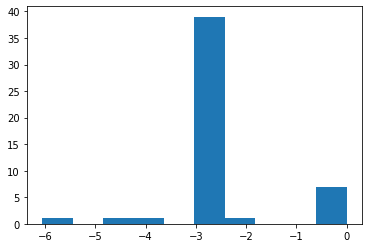

In [23]:
cm = CoherenceModel(model=lda_model, corpus=common_corpus, coherence='u_mass')
# N = lda_model_tfidf.
coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
coherence_by_topic = cm.get_coherence_per_topic()
# np.exp((coherence_by_topic/2)*N*(N-1))
plt.hist(coherence_by_topic)

In [0]:
# cm = CoherenceModel(model=lda_model_tfidf, corpus=common_corpus, coherence='u_mass')
# # N = lda_model_tfidf.
# coherence = cm.get_coherence()  # get coherence valuecm.for_topics()
# coherence_by_topic = cm.get_coherence_per_topic()
# # np.exp((coherence_by_topic/2)*N*(N-1))
# coherence_by_topic
list(character_documents.keys())[19]

(0, 'Anne Shirley')

In [0]:
lda_model.print_topic(1)

'0.175*"-PRON-" + 0.065*"ve" + 0.055*"talk" + 0.031*"blue" + 0.031*"wife" + 0.029*"set" + 0.024*"beautiful" + 0.024*"dress" + 0.021*"idea" + 0.021*"happy"'

In [24]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.438*"-PRON-" + 0.031*"girl" + 0.025*"heart" + 0.024*"room" + 0.023*"afternoon" + 0.021*"notice" + 0.021*"send" + 0.017*"cuthbert" + 0.016*"cry" + 0.015*"half"
Topic: 1 Word: 0.449*"-PRON-" + 0.064*"put" + 0.064*"back" + 0.037*"house" + 0.029*"live" + 0.028*"run" + 0.021*"place" + 0.018*"late" + 0.013*"full" + 0.012*"book"
Topic: 2 Word: 0.293*"-PRON-" + 0.088*"make" + 0.060*"time" + 0.038*"real" + 0.030*"pretty" + 0.028*"boy" + 0.024*"easy" + 0.020*"turn" + 0.019*"water" + 0.015*"run"
Topic: 3 Word: 0.171*"anne" + 0.087*"gilbert" + 0.074*"love" + 0.051*"life" + 0.049*"time" + 0.038*"marry" + 0.036*"friend" + 0.033*"good" + 0.033*"care" + 0.018*"talk"
Topic: 4 Word: 0.240*"-PRON-" + 0.062*"give" + 0.054*"awful" + 0.031*"bad" + 0.028*"mind" + 0.027*"word" + 0.022*"pose" + 0.020*"big" + 0.016*"catch" + 0.016*"kind"
Topic: 5 Word: 0.050*"dream" + 0.043*"feel" + 0.036*"day" + 0.036*"work" + 0.031*"world" + 0.027*"hope" + 0.024*"wear" + 0.024*"today" + 0.023*"ago" + 0.023*"t

In [0]:
characters_as_vectors_lda = [[e[1] for e in lda_model[i]] for i in bow_corpus]
anne_vectors_lda = find_vector_for_character(characters_as_vectors_lda, ["Anne", "Miss Blythe"])

# Cosine similarity (Doc2Vec)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity as cosine
cosine_similarities = np.zeros((len(anne_vectors), len(anne_vectors)))
for i in range(len(anne_vectors)):
  for e in range(len(anne_vectors)):
    cosine_similarities[i][e] = float(cosine(anne_vectors[i].reshape(1, -1), anne_vectors[e].reshape(1, -1)))

d = pd.DataFrame(cosine_similarities, columns = anne_characters, index = anne_characters)
d

,"((0, Anne Shirley), count:495)","((1, Anne Shirley), count:488)","((2, Anne Shirley), count:454)","((3, Anne Shirley), count:243)","((4, Anne Shirley), count:365)","((5, Anne Cordelia), count:211)","((6, Anne dearie), count:42)","((7, Anne dearie), count:10)","((7, Mrs. Blythe), count:42)"
"((0, Anne Shirley), count:495)",1.000000,0.979537,0.975596,0.895824,0.911549,0.847132,0.877068,0.928435,0.851691
"((1, Anne Shirley), count:488)",0.979537,1.000000,0.998885,0.964176,0.974047,0.934089,0.953268,0.982323,0.936639
"((2, Anne Shirley), count:454)",0.975596,0.998885,1.000000,0.969591,0.978153,0.941067,0.959264,0.986015,0.943703
"((3, Anne Shirley), count:243)",0.895824,0.964176,0.969591,1.000000,0.996181,0.993780,0.998165,0.994604,0.994947
"((4, Anne Shirley), count:365)",0.911549,0.974047,0.978153,0.996181,1.000000,0.988106,0.993430,0.996313,0.987663
"((5, Anne Cordelia), count:211)",0.847132,0.934089,0.941067,0.993780,0.988106,1.000000,0.997712,0.982704,0.998819
"((6, Anne dearie), count:42)",0.877068,0.953268,0.959264,0.998165,0.993430,0.997712,1.000000,0.991842,0.998376
"((7, Anne dearie), count:10)",0.928435,0.982323,0.986015,0.994604,0.996313,0.982704,0.991842,1.000000,0.983635
"((7, Mrs. Blythe), count:42)",0.851691,0.936639,0.943703,0.994947,0.987663,0.998819,0.998376,0.983635,1.000000


Text(0.5, 1.0, 'Doc2Vec Cosine Similarity Anne AGG & Anne other')

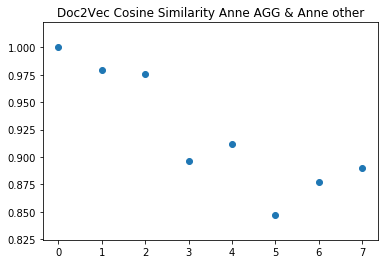

In [27]:
plt.scatter(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
plt.title("Doc2Vec Cosine Similarity Anne AGG & Anne other")

In [35]:
cosine(np.array(anne_vectors_lda[1]).reshape(1, -1), np.array(anne_vectors_lda[2]).reshape(1, -1))

array([[0.43228099]])

# Cosine similarity Latent Dirichlet Allocation

In [36]:
anne_vectors_lda = [np.array(i) for i in anne_vectors_lda]
from sklearn.metrics.pairwise import cosine_similarity as cosine
cosine_similarities = np.zeros((len(anne_vectors_lda), len(anne_vectors_lda)))
for i in range(len(anne_vectors_lda)):
  for e in range(len(anne_vectors_lda)):
    cosine_similarities[i][e] = float(cosine(anne_vectors_lda[i].reshape(1, -1), anne_vectors_lda[e].reshape(1, -1)))

d = pd.DataFrame(cosine_similarities, columns = anne_characters, index = anne_characters)
d

,"((0, Anne Shirley), count:495)","((1, Anne Shirley), count:488)","((2, Anne Shirley), count:454)","((3, Anne Shirley), count:243)","((4, Anne Shirley), count:365)","((5, Anne Cordelia), count:211)","((6, Anne dearie), count:42)","((7, Anne dearie), count:10)","((7, Mrs. Blythe), count:42)"
"((0, Anne Shirley), count:495)",1.000000,0.424246,0.364627,0.225482,0.219529,0.209362,0.309639,0.358274,0.500779
"((1, Anne Shirley), count:488)",0.424246,1.000000,0.432281,0.312958,0.283374,0.284750,0.294282,0.449394,0.368612
"((2, Anne Shirley), count:454)",0.364627,0.432281,1.000000,0.324719,0.381985,0.417253,0.293351,0.464253,0.377940
"((3, Anne Shirley), count:243)",0.225482,0.312958,0.324719,1.000000,0.342654,0.400149,0.299296,0.507677,0.238204
"((4, Anne Shirley), count:365)",0.219529,0.283374,0.381985,0.342654,1.000000,0.414218,0.259730,0.394926,0.311834
"((5, Anne Cordelia), count:211)",0.209362,0.284750,0.417253,0.400149,0.414218,1.000000,0.278460,0.533299,0.304113
"((6, Anne dearie), count:42)",0.309639,0.294282,0.293351,0.299296,0.259730,0.278460,1.000000,0.523047,0.416295
"((7, Anne dearie), count:10)",0.358274,0.449394,0.464253,0.507677,0.394926,0.533299,0.523047,1.000000,0.612921
"((7, Mrs. Blythe), count:42)",0.500779,0.368612,0.377940,0.238204,0.311834,0.304113,0.416295,0.612921,1.000000


Text(0.5, 1.0, 'LDA Cosine Similarity Anne AGG & Anne other')

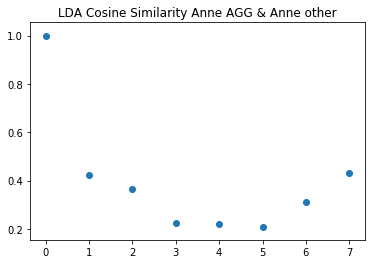

In [37]:
plt.scatter(range(8), list(d.iloc[0][:-2]) + [np.mean(d.iloc[0, -2:])])
plt.title("LDA Cosine Similarity Anne AGG & Anne other")

In [0]:
# from nltk.tokenize import sent_tokenize
# from gensim.test.utils import common_texts
# from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# sents = []
# for i in sentences:
#   sents.extend([e[0].split() for e in i])

# documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(sents)]
# model_d2v = Doc2Vec(documents, vector_size=300, window=3, min_count=1, workers=4, dm = 1)
# docs_as_vectors = np.array([model_d2v.infer_vector(i) for i in sents])
# #should add other characters

In [0]:
#Evaluating Doc2Vec 
#reading human-annotated character relation annotations
char_rel_frame = pd.read_csv(direc+"character_relation_annotations.txt", sep = "\t")
char_rel_frame = char_rel_frame[char_rel_frame["title"]=="Anne of Green Gables"]


In [0]:
coarse = char_rel_frame["coarse_category"].unique()
affinity = char_rel_frame["affinity"].unique()
fine = char_rel_frame["fine_category"].unique()
change = char_rel_frame["change"].unique()

criteria = [coarse, affinity, fine, change]
col = ["coarse_category", "affinity", "fine_category", "change"]

for n in range(4):
  for c in criteria[n]:
    print(c)
    for i in range(len(char_rel_frame[char_rel_frame[col[n]]==c])):
      c1 = find_vector_for_character(characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_1"].split()[0]], 0)
      c2 = find_vector_for_character(characters_as_vectors, [char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"], char_rel_frame[char_rel_frame[col[n]]==c].iloc[i]["character_2"].split()[0]], 0)
      if c1.shape==(1, 300) and c2.shape==(1, 300):
        print(cosine(c1, c2))

familial
[[0.9947117]]
[[0.958065]]
[[0.9682449]]
[[0.9989392]]
[[0.9682449]]
[[0.958065]]
[[0.9947117]]
[[0.9989392]]
social
[[0.8891893]]
[[0.97418475]]
[[0.8931802]]
[[0.8815987]]
[[0.8891893]]
[[0.8931802]]
[[0.97418475]]
[[0.8997846]]
professional
[[0.9109641]]
[[0.86944014]]
[[0.9109641]]
positive
[[0.9947117]]
[[0.958065]]
[[0.9682449]]
[[0.8891893]]
[[0.9109641]]
[[0.9989392]]
[[0.9682449]]
[[0.958065]]
[[0.9947117]]
[[0.8891893]]
[[0.8931802]]
[[0.9109641]]
[[0.8997846]]
neutral
[[0.97418475]]
negative
[[0.8931802]]
[[0.8815987]]
[[0.86944014]]
[[0.97418475]]
[[0.9989392]]
brother/sister
[[0.9947117]]
[[0.9947117]]
orphan
[[0.958065]]
[[0.9682449]]
friend
[[0.8891893]]
[[0.97418475]]
[[0.8891893]]
[[0.97418475]]
[[0.8997846]]
unrequited love interest
[[0.8931802]]
teacher
[[0.9109641]]
[[0.86944014]]
[[0.9109641]]
parent
[[0.9989392]]
[[0.9989392]]
rivals
[[0.8815987]]
[[0.8931802]]
foster parent
[[0.9682449]]
[[0.958065]]
no
[[0.9947117]]
[[0.97418475]]
[[0.9989392]]
[[0.8815

In [0]:
char_rel_frame

,annotator,change,title,author,character_1,character_2,affinity,coarse_category,fine_category,detail
950,annotator_11,no,Anne of Green Gables,L. M. Montgomery,Matthew Cuthbert,Marilla Cuthbert,positive,familial,brother/sister,NR
951,annotator_11,yes,Anne of Green Gables,L. M. Montgomery,Anne Shirley,Matthew Cuthbert,positive,familial,orphan,The relationship gets stronger
952,annotator_11,yes,Anne of Green Gables,L. M. Montgomery,Anne Shirley,Marilla Cuthbert,positive,familial,orphan,The relationship gets stronger.
953,annotator_11,yes,Anne of Green Gables,L. M. Montgomery,Diana Barry,Anne Shirley,positive,social,friend,The friendship grows stronger throughout the b...
954,annotator_11,no,Anne of Green Gables,L. M. Montgomery,Mrs. Rachel Lynde,Marilla Cuthbert,neutral,social,friend,Marilla basically puts up with Rachel.
955,annotator_11,yes,Anne of Green Gables,L. M. Montgomery,Gilbert Blythe,Anne Shirley,negative,social,unrequited love interest,She hates him at first but they become friends...
956,annotator_11,yes,Anne of Green Gables,L. M. Montgomery,Miss Muriel Stacy,Anne Shirley,positive,professional,teacher,Grows from being teacher/student to being frie...
957,annotator_11,no,Anne of Green Gables,L. M. Montgomery,Mrs. Barry,Diana Barry,positive,familial,parent,NR
958,annotator_11,no,Anne of Green Gables,L. M. Montgomery,Josie Pye,Anne Shirley,negative,social,rivals,NR
959,annotator_11,no,Anne of Green Gables,L. M. Montgomery,Mr. Phillips,Anne Shirley,negative,professional,teacher,NR
